<a href="https://colab.research.google.com/github/sethporter903/Deep-Learning-with-TensFlow/blob/main/Deep_Learning_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal as sg
import tensorflow as tf


In [ ]:
image = [[97,52,99,62,69,45,70],[99,14,60,50,74,45,22], [59,72,74,14,74,100,28],
         [28,8,47,85,2,88,77], [74,6,30,87,49,22,43],[86,87,4,53,36,10,46], 
         [54,7,67,23,29,26,15]]

In [ ]:
gaussian_filter = [[1,2,1],[2,4,2],[1,2,1]]

In [ ]:
#call the convolve function, changes the image from an 7 by 7 image to a 9 by 9 image 

sg.convolve(image,gaussian_filter)

array([[  97,  246,  300,  312,  292,  245,  229,  185,   70],
       [ 293,  704,  787,  808,  818,  733,  644,  459,  162],
       [ 354,  860,  951,  914,  936,  993,  903,  519,  142],
       [ 245,  656,  832,  839,  805,  944, 1045,  643,  155],
       [ 189,  472,  575,  761,  867,  823,  948,  748,  225],
       [ 262,  631,  587,  641,  871,  726,  629,  560,  209],
       [ 300,  787,  779,  613,  687,  584,  436,  368,  150],
       [ 194,  489,  534,  476,  430,  349,  294,  214,   76],
       [  54,  115,  135,  164,  142,  107,   96,   56,   15]])

In [ ]:
#SG.convolove assumes full convolve function and turn the 9X9 to a 5X5
sg.convolve(image,gaussian_filter,"valid")

array([[ 951,  914,  936,  993,  903],
       [ 832,  839,  805,  944, 1045],
       [ 575,  761,  867,  823,  948],
       [ 587,  641,  871,  726,  629],
       [ 779,  613,  687,  584,  436]])

#Problem 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 02 Rice.png to 02 Rice (1).png


In [ ]:
#Import the image from the drive
from io import BytesIO 
import numpy as np
from PIL import Image
from scipy import signal
import matplotlib.pyplot as plt

im = Image.open(BytesIO(uploaded['02 Rice.png'])) 

In [ ]:
#Ensure that the image is recognized as greyscale by the computer
im = im.convert("L")
#flatten the image into an array
arr = np.asarray(im)

In [ ]:
Laplacian_Sharpening_Filter_1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
Laplacian_Sharpening_Filter_2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

In [ ]:
#apply the Convolve operation
grad1 = signal.convolve2d(arr, Laplacian_Sharpening_Filter_1, mode = 'same', boundary = 'symm')

In [ ]:
#Now that the matrix below shows the values of derivatives lets convert it into a picture

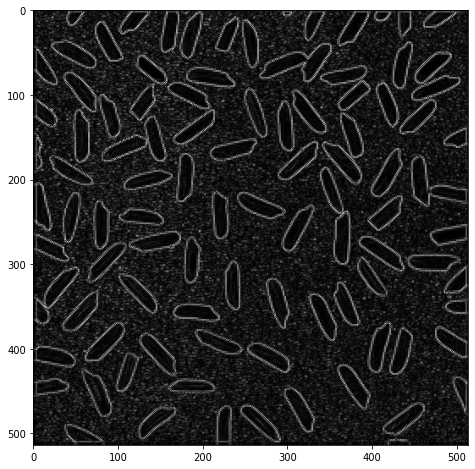

In [ ]:
fig,aux = plt.subplots(figsize = (8,8))
aux.imshow(np.absolute(grad1), cmap = 'gray')


In [ ]:
#apply the Convolve operation for the 2nd filter
grad2 = signal.convolve2d(arr, Laplacian_Sharpening_Filter_2, mode = 'same', boundary = 'symm')

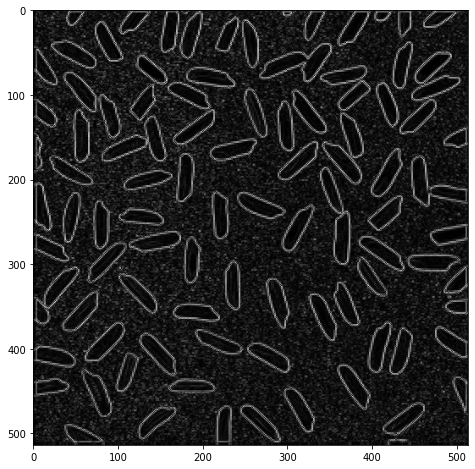

In [ ]:
fig,aux = plt.subplots(figsize = (8,8))
aux.imshow(np.absolute(grad2), cmap = 'gray')

In [ ]:
#try 2 other filters
Laplacian_Sharpening_Filter_3 = [[0,1,0],[1,-5,1,],[0,1,0]]
Laplacian_Sharpening_Filter_4 = [[1,1,1],[1,-9,1],[1,1,1]]

In [ ]:
grad3 = signal.convolve2d(arr, Laplacian_Sharpening_Filter_3, mode = 'same', boundary = 'symm')

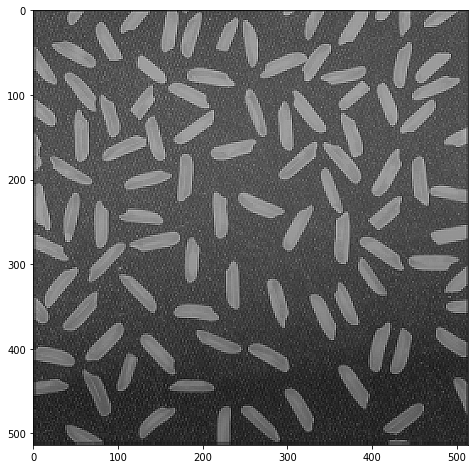

In [ ]:
fig,aux = plt.subplots(figsize = (8,8))
aux.imshow(np.absolute(grad3), cmap = 'gray')

In [ ]:
grad4 = signal.convolve2d(arr, Laplacian_Sharpening_Filter_4, mode = 'same', boundary = 'symm')

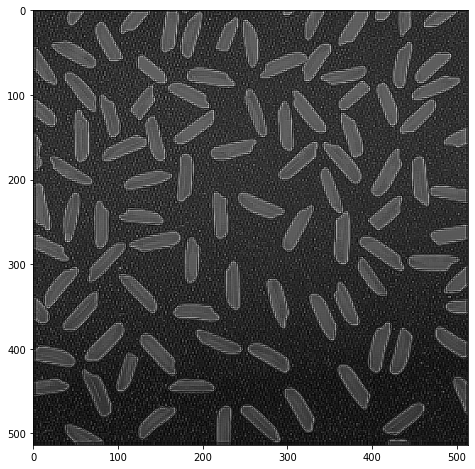

In [ ]:
fig,aux = plt.subplots(figsize = (8,8))
aux.imshow(np.absolute(grad4), cmap = 'gray')

# Problem 3 

In [ ]:
#Import common Computer vision library
import cv2

In [ ]:
#Change from the positive and negative from a derivative represents a change in the direciton of the derivative (tangent line)
#A step is a sudden change in pixel intensity values
#The second derivative in a descreet space can be viewed as the slope of the previous 3 1st derivative points

## 2. Laplacian Filter

**Laplacian Filter Math:**
$$ \nabla^2f(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

$$\nabla^2f(x,y)= f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)$$

Since this equation is applied to an image, we are applying a discrete definition to the function f(x,y), meaning the function is refering to specific pixels within the image or filter:

<img src="https://drive.google.com/uc?id=1cROjvzR7vGzA45oKNhOc0aMdFhMdMz4J" width="400" height="200" />

**Image output:**  
* Laplacian filter produces a sharp image with a dark background
* To generate an image with details, add or subtract the filtered image from the original:  
$$ g(x,y) = f(x,y) \pm \nabla^2f(x,y)$$

**Notes about equation:**  
*First order derivative of a discrete function:*
$$\frac{\partial f(x)}{\partial x} = f(x+1) - f(x)$$

*Second order derivative of a one-dimensional discrete function:*
$$\frac{\partial^2 f(x)}{\partial x^2} = f(x+1) - f(x) - (f(x) - f(x-1)) = f(x+1) + f(x-1) -2f(x)$$
The second order derivative can be thought of as the difference between between two adjacent first-order derivatives.

Naturally, when taking a first derivative of an array f with n = 10, the array f' (first derivative) will end up being n = 9.  The array f'' will end up being n = 8.

**Meaning of derivatives in the context of edge detection:**
* First derivatives
  * =0 &#8594; flat segment
  * !=0 &#8594; onset of gray-level step or ramp
    * occurs along ramps
  * Thicker edges
  * Gray-level steps
* Second derivatives
  * =0 &#8594; flat areas
    * occurs along ramps or constant slopes
  * !=0 &#8594; onset and end of a gray-level step or ramp
  * Thin lines
  * Isolated points
  * Double response at step changes
  * Better suited than first derivative for image enhancement since it enhances finer details


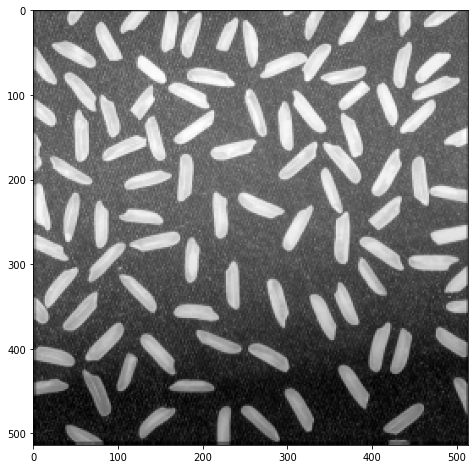

In [ ]:
img2 = cv2.imread('02 Rice.png',0)

fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(img2, cmap= 'gray')

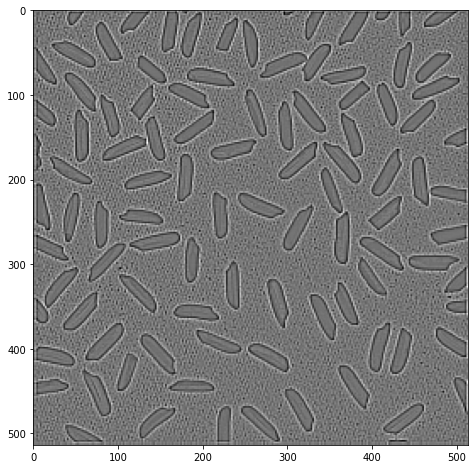

In [ ]:
laplacian = cv2.Laplacian(img2,cv2.CV_64F, ksize =5 )

fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(laplacian, cmap= 'gray')

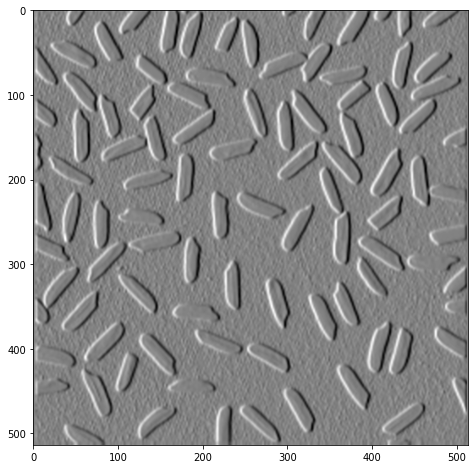

In [ ]:
#sobelx makes it so that the more vertical aspects of the image are darker
sobelx = cv2.Sobel(img2, cv2.CV_64F, 1, 0,ksize = 7)
fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(sobelx, cmap= 'gray')

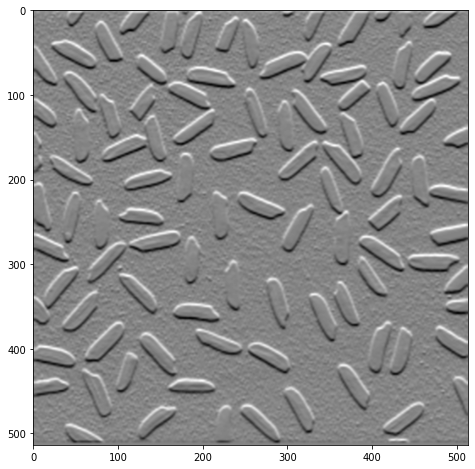

In [ ]:
#sobely makes it so that the more horizontal aspects of the image are darker
sobely = cv2.Sobel(img2, cv2.CV_64F, 0, 1,ksize = 7)
fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(sobely, cmap= 'gray')

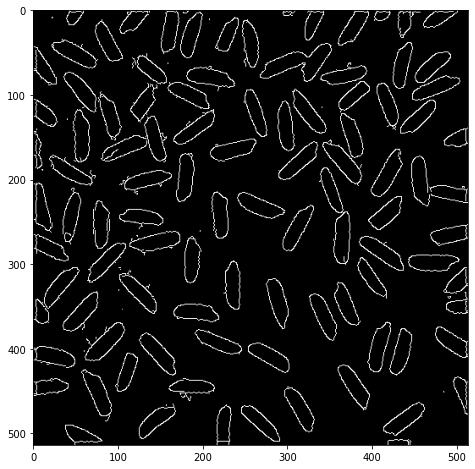

In [ ]:
canny = cv2.Canny(img2,50,200)
fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(canny, cmap= 'gray')